In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline 
import fancyimpute as ft
import seaborn as sns
from sklearn.manifold import TSNE
import glob
import codecs

/home/krishna/miniconda3/envs/integratedData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [169]:
lincs_p100 = {}
cell_id = {}
gene_id = {}
pr_modified = {}
data_for_drugs = {}
keys = lincs_p100.keys()

for f in glob.glob('*.gct'):
    a = f.split('_annotated')
    name = str(a[0])
    reading_file =  doc1 = codecs.open(f) #open for reading with "universal" type set
    lincs_p100[name] = pd.read_csv(reading_file, sep='\t', skiprows=2)
    
for f in lincs_p100.keys():
#     print f
    header_index = (lincs_p100[f].index[lincs_p100[f]['id'] =='pert_iname'])[0]
    cell_id[f] = lincs_p100[f].iloc[(lincs_p100[f].index[lincs_p100[f]['id'] =='cell_id'])[0]][-1]
    findingGneIndex = (lincs_p100[f].index[lincs_p100[f]['id'] =='10011_DYRK_Y321_IYQY[+80]IQSR'])[0]
#     gene_id[f] = lincs_p100[f]['pr_gene_symbol'][findingGneIndex:]
    pr_modified[f] = lincs_p100[f]['pr_p100_modified_peptide_code'][findingGneIndex:]
#     print header_index
    j = findingGneIndex
    for i in lincs_p100[f]['pr_p100_modified_peptide_code'].values[findingGneIndex:]:
        gene_id[i] =  lincs_p100[f]['pr_gene_symbol'].values[j]
        j +=1
#     lincs[f][pr_gene_symbol]

    lincs_p100[f].columns = lincs_p100[f].iloc[header_index]
    
for f in keys:
    lincs_p100[f].columns = lincs_p100[f].columns.fillna('to_drop')
    
    #Fill nan to to_prop, in next step drop these columns     
    lincs_p100[f].drop('to_drop', axis = 1, inplace = True)
    rowstoremove       = lincs_p100[f]['pert_iname'].tolist()
    first_header_index = rowstoremove.index('det_well')
    first_header = lincs_p100[f].iloc[first_header_index].tolist()
    remove_rows_until_this_index = rowstoremove.index('10011_DYRK_Y321_IYQY[+80]IQSR')
    lincs_p100[f] = lincs_p100[f][remove_rows_until_this_index:]
#     print (f,remove_rows_until_this_index)

#     i = 0
#     drug = lincs_p100[f].columns[1:][0]
#     header_list = ['Drugs_plate']
#     for col in lincs_p100[f].columns[1:]:

#         if (drug==col):
#             i=i+1
        
#         else:
#             i = 1
#             drug = col
#         header_list.append(col+'_'+str(i))
    tups = zip(first_header,lincs_p100[f].columns)
    lincs_p100[f].columns = lincs_p100[f].columns


https://clue.io/connectopedia/what_are_landmark_genes



In [3]:
lincs_p100['LINCS_P100_PRM_Plate18'].head()

12,pert_iname,DMSO,DMSO,DMSO,gsk126,gsk126,gsk126,MS-275,MS-275,MS-275,...,EPZ004777,EPZ004777,vorinostat,vorinostat,vorinostat,1271738-62-5,1271738-62-5,LY-294002,LY-294002,LY-294002
19,10011_DYRK_Y321_IYQY[+80]IQSR,-0.165580186600559,-0.00769652414403371,0.397421160989184,-0.210475158094743,-0.353982907224295,-0.244983740549438,0.255093021934511,0.00711360289246704,0.0404460999243241,...,-0.14473698623156,0.0179692149402596,0.258641305845779,0.0346790364043769,0.0770513638798213,0.141689159339611,-0.11397006840088,0.0678706415261512,0.0394102282549505,-0.0363331670749237
20,1024_ISPK1_S369_TPKDS[+80]PGIPPSANAHQLFR,0.203763538014679,0.108552252224702,-0.106450516937912,0.330313679722808,0.427386913591303,0.416115855519116,0.047532340525513,0.184231966193244,0,...,0.357855084880994,0.185648454399675,-0.267465488538442,-0.155158114766807,-0.0591992759016042,-0.175824440645919,0.0494021367136659,-0.154227846361242,0.0976184574199799,0.166602657021508
21,1078_ARM2_S87_RNS[+80]SEASSGDFLDLK,0.128180821467438,0.0851278982389212,0.285045481164639,-0.477060325336151,0,0.152893953485877,0.232279996010802,-0.122880706413665,-0.147248175693215,...,0.0923265424482584,-0.234939182047619,-0.545149917736476,-0.476726334914819,-0.501492252331234,-0.282878278905241,-0.184449379033074,-0.421173000410866,-0.235243821644112,0.163580224181624
22,1130_HSPC216_S321_LPLVPES[+80]PRR,0.0415885975587873,0.101681614897966,-0.00266487183144193,-0.059368790715679,0.166883107072162,0.234564013078464,-0.460759597271034,0.00940918039671845,-0.0207836697659883,...,0.0627014259579626,0.0163985435718683,-0.0788605481011253,-0.139022141766904,-0.0794102593782186,-0.105344036203833,0.287971766400214,0.0374389141311378,0.0736420238164478,-0.107430712369047
23,1142_CTG26_S956_ANAS[+80]PQKPLDLK,0.0855742698290712,0.113757599844063,-0.0324901791331675,0.0269930008514158,-0.0227721358809187,-0.113268207840194,-0.0344705847116751,-0.029929987029483,-0.063185528399623,...,0.0129452965126082,-0.117163247622907,-0.0435222219897561,-0.0597517532398376,0.0155611655150422,0.1537701741147,0.414761969288728,0.0348564144735867,0.0160079070057358,0.00920957978385306


In [4]:
from collections import defaultdict 
working_lincs_p100 = {}
cell_id_df_index = defaultdict(list)
for f in keys:
    ll = []

    working_lincs_p100[f] = { cell_id[f] : pr_modified[f]}
    ll.append(cell_id[f])
    cell_id_df_index[cell_id[f]].append(f)
#     print (np.array(lincs_p100[f]).shape)
    for col in (lincs_p100[f].columns).unique()[1:]:
#         print (len(lincs_p100[f][col].as_matrix().shape), f)
        if (len(lincs_p100[f][col].values.shape) > 1):
            _replicatesValue = pd.to_numeric(lincs_p100[f][col].values[:,0])
            numberofreplicas = lincs_p100[f][col].shape[1]
            for i in range(1,numberofreplicas):
                _replicatesValue = np.vstack((np.array(_replicatesValue), 
                                              pd.to_numeric(lincs_p100[f][col].values[:,i])))
#         print _replicatesValue.T.shape

            _replicatesValue = _replicatesValue.T
            average_replicate = np.average(_replicatesValue,axis=1)
        else:
            _replicatesValue = pd.to_numeric(lincs_p100[f][col].values)
             
        ll.append(col)
#         print average_replicate
        working_lincs_p100[f][str(col)] = average_replicate
     
    new = pd.DataFrame.from_dict(working_lincs_p100[f])
    columnsTitles = ll
    new=new.reindex(columns=columnsTitles)
    working_lincs_p100[f] = new

#         working_lincs_p100[f] = [cell_id[f]
                                       
#         working_lincs_p100[f] = [cell_id[f]:lincs_p100[f].columns[0]]
        
#         #Convert strings to numerical value
# #         print f, col
#         for i in :
#             lincs_p100[f][col] = pd.to_numeric(lincs_p100[f][col].as_matrix())

In [5]:
# df = working_lincs_p100[f]
# sns.heatmap(df, annot=True)

Integrating kinease inhibitors

    Plate32 Kinase Inhibitors YAPC
    Plate34 Kinase Inhibitors PC3
    Plate27 Kinase Inhibitors NPC
    Plate29_03H Kinase Inhibitors MCF7
    Plate33 Kinase Inhibitors A549
    Plate28 Kinase Inhibitors A375
    Plate29_24H Kinase Inhibitors (24h) MCF7
    Plate29_06H Kinase Inhibitors (6h) MCF7



In [6]:
kinase_lics = ['LINCS_P100_DIA_Plate27',
'LINCS_P100_PRM_Plate28',
'LINCS_P100_PRM_Plate29_03H',
'LINCS_P100_PRM_Plate29_06H',
'LINCS_P100_PRM_Plate29_24H',
'LINCS_P100_PRM_Plate32',
'LINCS_P100_DIA_Plate34',
'LINCS_P100_DIA_Plate33'
]
kinase_concat_lincs = working_lincs_p100[kinase_lics[0]].set_index(working_lincs_p100[kinase_lics[0]].columns[0])

for i in range(1,len(kinase_lics)):
    print (i, working_lincs_p100[kinase_lics[i]].columns[0])
    _ = working_lincs_p100[kinase_lics[i]].set_index(working_lincs_p100[kinase_lics[i]].columns[0])
    kinase_concat_lincs = pd.concat([kinase_concat_lincs, _])

1 A375
2 MCF7
3 MCF7
4 MCF7
5 YAPC
6 PC3
7 A549


#### Checking for missing values

In [97]:
print (pd.isnull(kinase_concat_lincs).values.any())

True


In [8]:
_tmpDf = kinase_concat_lincs
integrated_kinase = pd.DataFrame(ft.KNN(3).complete(_tmpDf.values),
                             index = _tmpDf.index, 
                             columns=_tmpDf.columns) 

Imputing row 1/682 with 0 missing, elapsed time: 0.886
Imputing row 101/682 with 0 missing, elapsed time: 1.068
Imputing row 201/682 with 0 missing, elapsed time: 1.070
Imputing row 301/682 with 0 missing, elapsed time: 1.071
Imputing row 401/682 with 0 missing, elapsed time: 1.072
Imputing row 501/682 with 0 missing, elapsed time: 1.074
Imputing row 601/682 with 0 missing, elapsed time: 1.078


In [9]:
integrated_kinase.shape

(682, 32)

In [10]:
for plate in kinase_lics[-3:]:
    print (plate, pd.isnull(working_lincs_p100[plate]).values.any())

LINCS_P100_PRM_Plate32 True
LINCS_P100_DIA_Plate34 True
LINCS_P100_DIA_Plate33 True


In [11]:
df_03 = working_lincs_p100['LINCS_P100_PRM_Plate29_03H'].set_index('MCF7')

In [78]:
# plt.rcParams['figure.figsize'] = [30, 25]

# sns.clustermap(df_03, cmap='RdBu_r', figsize = (20,15));

In [79]:
# df_06 = working_lincs_p100['LINCS_P100_PRM_Plate29_06H'].set_index('MCF7')
# df_06 = df_06.interpolate()
# sns.clustermap(df_06, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

## Cell-line MCF7

MCF-7 is a breast cancer cell line. 

HeatMap will give us a comparative view of expression level:

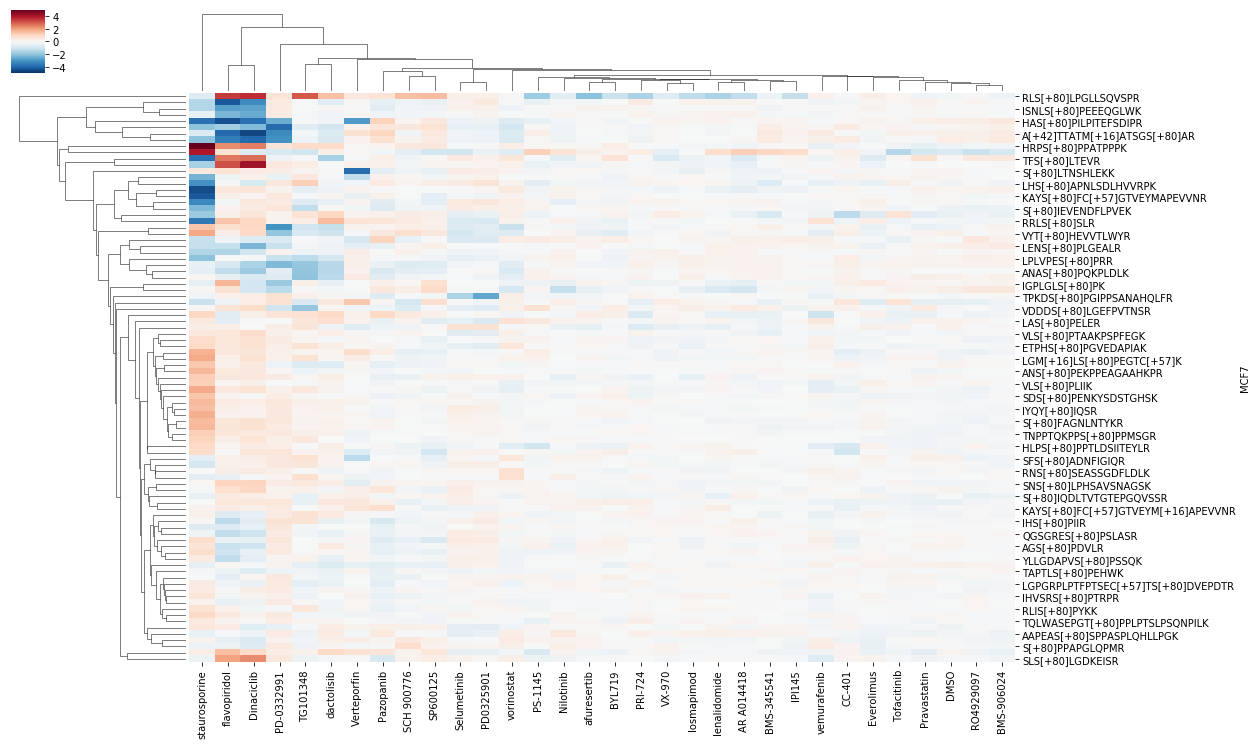

In [100]:
df_24 = working_lincs_p100['LINCS_P100_PRM_Plate29_24H'].set_index('MCF7')
df_24 = df_24.interpolate()
sns.clustermap(df_24, cmap='RdBu_r',figsize = (18,12), vmin=-5, vmax=5);

### Drugs that causes most changes in the gene expression levels in MCF7 cell lines are:
- **staurosporine** : Staurosporine is a potent, non-selective inhibitor of protein kinases, including protein kinase C. This agent induces apoptosis by an undetermined mechanism. (pubchem) 
- **flavopiridol** : As an inhibitor of cyclin-dependent kinase, alvocidib induces cell cycle arrest by preventing phosphorylation of cyclin-dependent kinases (CDKs) and by down-regulating cyclin D1 and D3 expression.  
- **Dinaciclib** : Dinaciclib selectively inhibits cyclin dependent kinases CDK1, CDK2, CDK5, and CDK9; 


# Downregulation genes for staurosporine

In [191]:
# print (gene_id)
for i in downregulations(df_24,'staurosporine' ):
    print (i, gene_id[i])




VGS[+80]LDNVGHLPAGGAVK MAP4
TFS[+80]LTEVR KIF4A
SLVGS[+80]WLK C22orf9
HAS[+80]PILPITEFSDIPR TMPO
RRLS[+80]SLR RPS6
KAYS[+80]FC[+57]GTVEYMAPEVVNR RPS6KA1


# These set of gene mainly involved in the M-Phase of cell cycle (using reactome)

In [192]:
for i in upregulations(df_24,'staurosporine' ):
    print (i, gene_id[i])

IYQY[+80]IQSR DYRK1A
TPKDS[+80]PGIPPSANAHQLFR RPS6KA3
RNS[+80]SEASSGDFLDLK HN1
LPLVPES[+80]PRR ZC3HC1
ANAS[+80]PQKPLDLK NCOR2
SMS[+80]VDLSHIPLKDPLLFK KIAA0701
LENS[+80]PLGEALR OCIAD1
ANS[+80]FVGTAQYVSPELLTEK PDPK1
TNPPTQKPPS[+80]PPMSGR ABI1
SNS[+80]LPHSAVSNAGSK WDR20
S[+80]PTGPSNSFLANMGGTVAHK RBM17
S[+80]LTAHSLLPLAEK IQGAP3
AAPEAS[+80]SPPASPLQHLLPGK FAM129B
S[+122]DKPDM[+16]AEIEKFDK TMSB4X
S[+122]DKPDMAEIEKFDK TMSB4X
SLS[+80]LGDKEISR AP1GBP1
DLVQPDKPAS[+80]PK ZC3H14
S[+80]FAGNLNTYKR PFKP
SPS[+80]PAHLPDDPKVAEK LARP5
RLIS[+80]PYKK HAT1
S[+80]IQDLTVTGTEPGQVSSR MAP3K7
HRPS[+80]PPATPPPK SRRM1
IHS[+80]PIIR BRD4
LHS[+80]APNLSDLHVVRPK ULK1
LLEDS[+80]EESSEETVSR DHX16
TLGRRDS[+80]SDDWEIPDGQITVGQR BRAF
S[+80]PPAPGLQPM[+16]R FOSL2
S[+80]PPAPGLQPMR FOSL2
LAS[+80]PELER JUND
IGPLGLS[+80]PK RPL12
TPS[+80]IQPSLLPHAAPFAK NUP214
A[+42]TTATM[+16]ATSGS[+80]AR EIF4A3
A[+42]TTATMATSGS[+80]AR EIF4A3
LIPGPLS[+80]PVAR BAT2
LGM[+16]LS[+80]PEGTC[+57]K FASN
LGMLS[+80]PEGTC[+57]K FASN
ISNLS[+80]PEEEQGLWK FAM76B
VSM

# It will be easy to find variation using covariance analysis and PCA

# Co-variance analysis

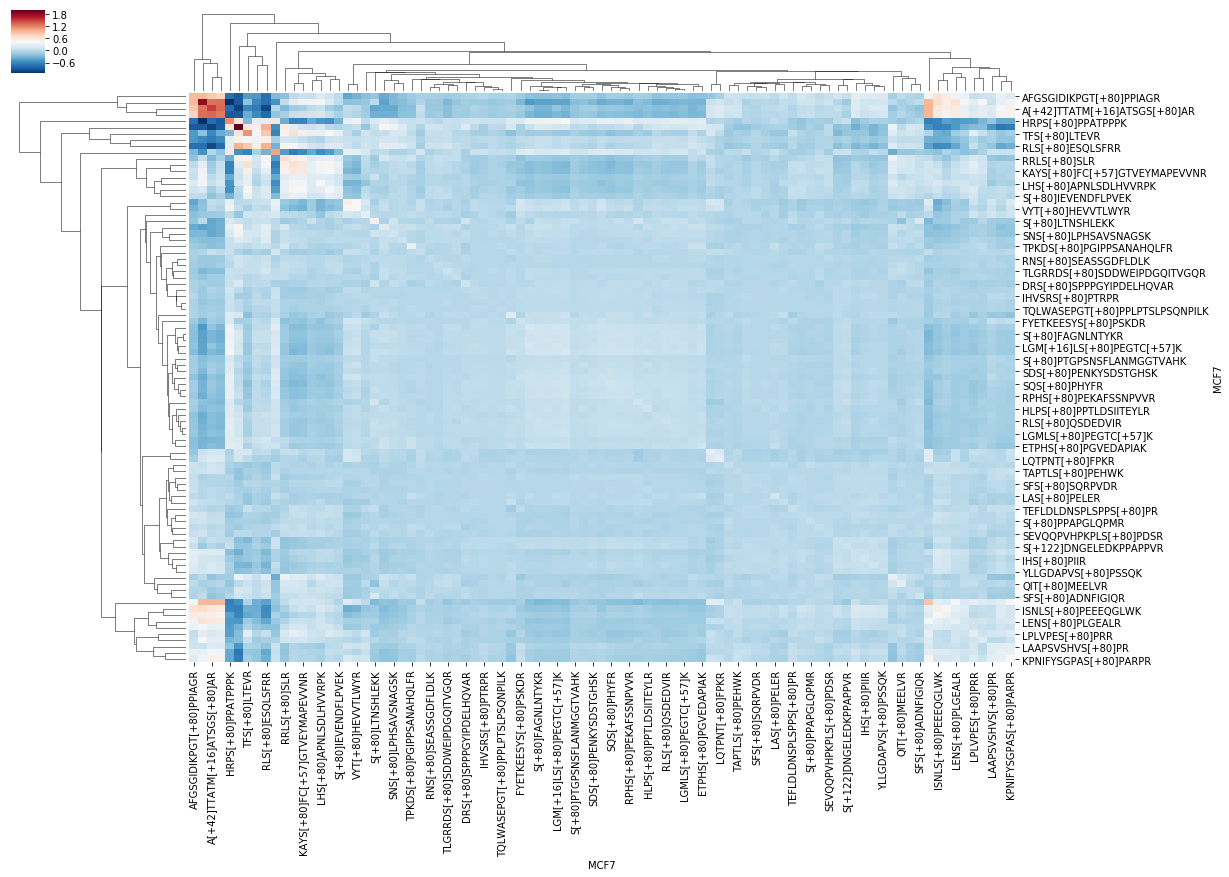

In [129]:
sns.clustermap(df_24.T.cov(), cmap='RdBu_r', figsize = (18,12));

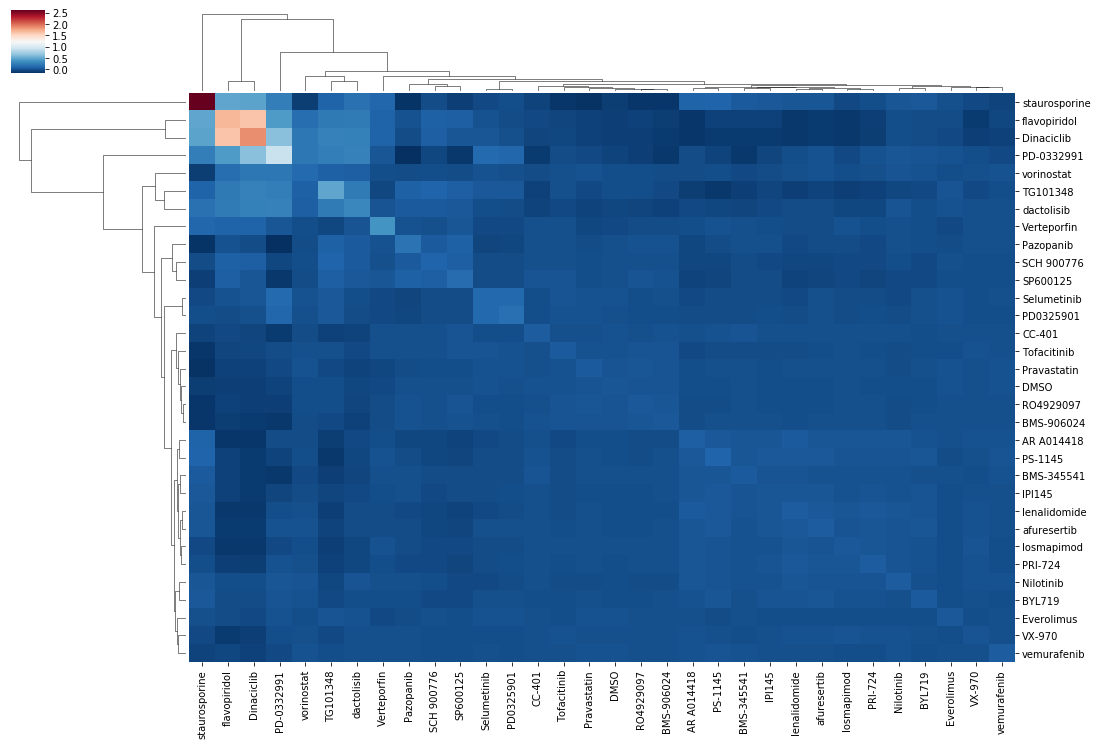

In [130]:
sns.clustermap(df_24.cov(), cmap='RdBu_r', figsize = (18,12));

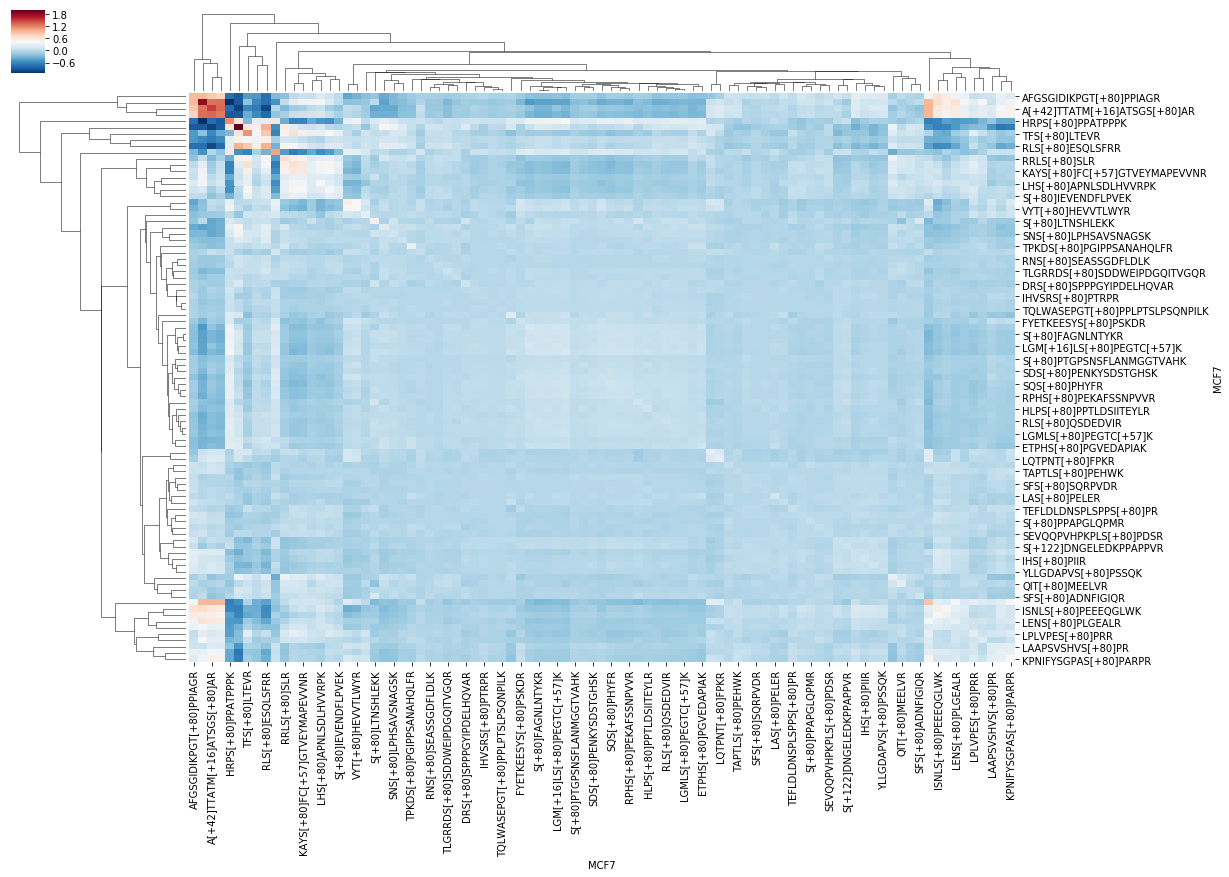

In [190]:
sns.clustermap(df_24.T.cov(), cmap='RdBu_r', figsize = (18,12));

# Correlation analysis:

Check if matrix is positive semi-definite 

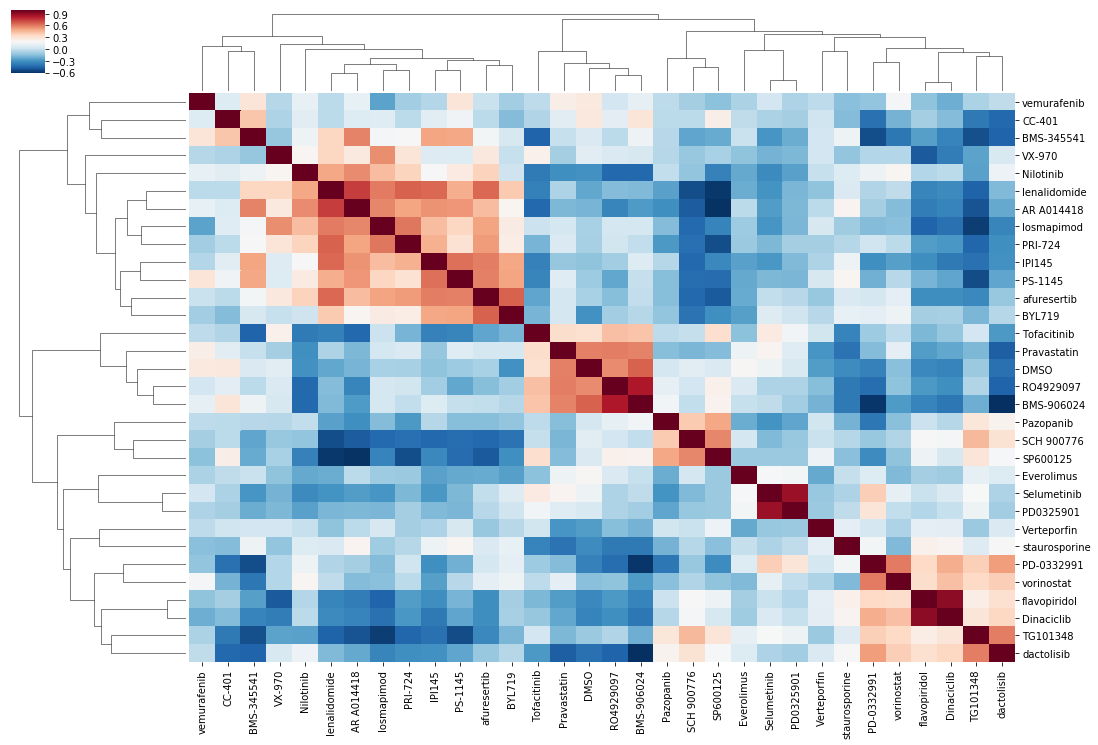

In [185]:
sns.clustermap((df_24.corr()), cmap='RdBu_r', figsize = (18,12));

## There are at-least 4-5 clusters
## it is interesting effect of some drugs are correlated that is almost not noticed by the PCA. 
## Find mutual information and see if there is any additional information
- Pearson's coefficient and Spearman's rank order coefficient, 

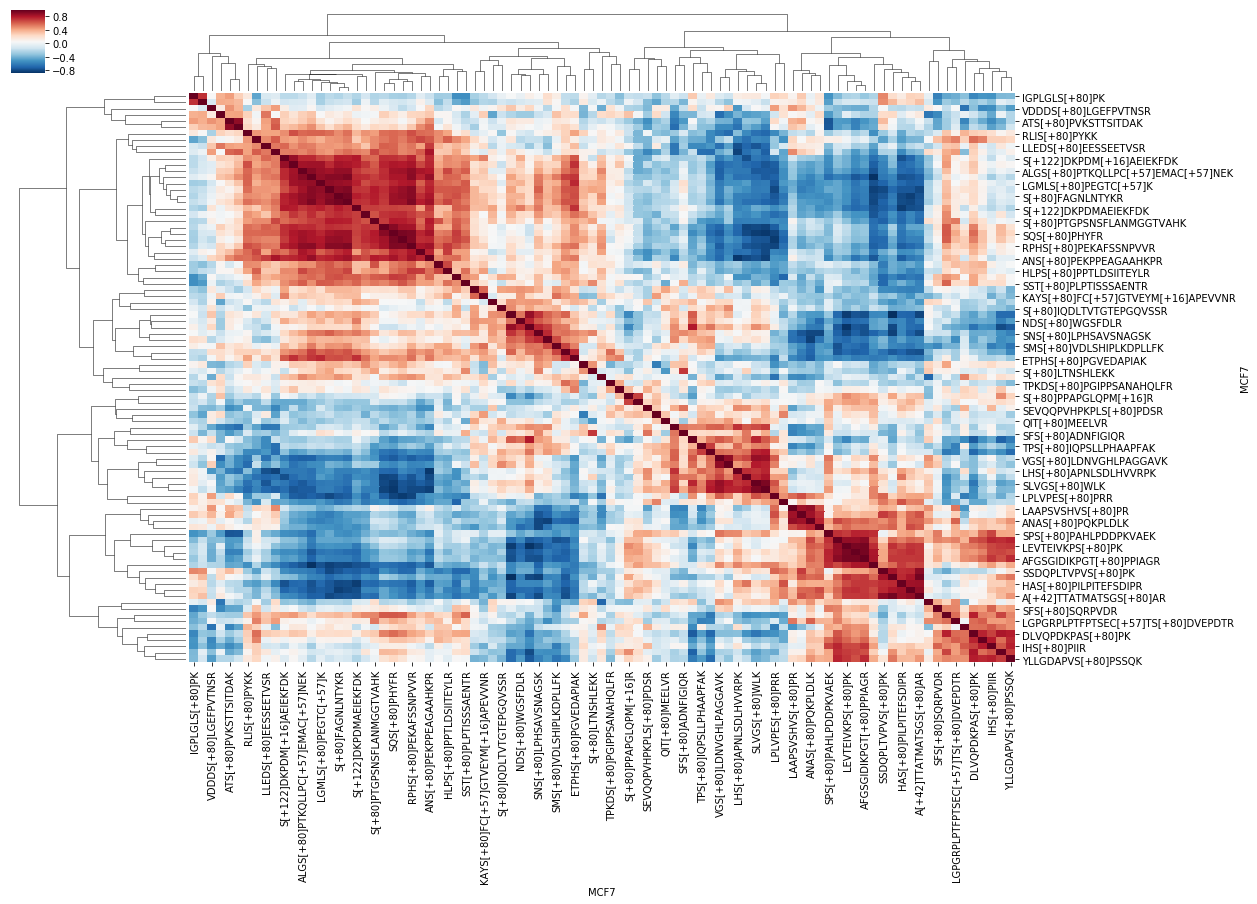

In [186]:
sns.clustermap((df_24.T.corr()), cmap='RdBu_r', figsize = (18,12));


In [ ]:
for i in df_24.columns:
    print (i, len(downregulations(df_24,i)), len((upregulations(df_24,i))))

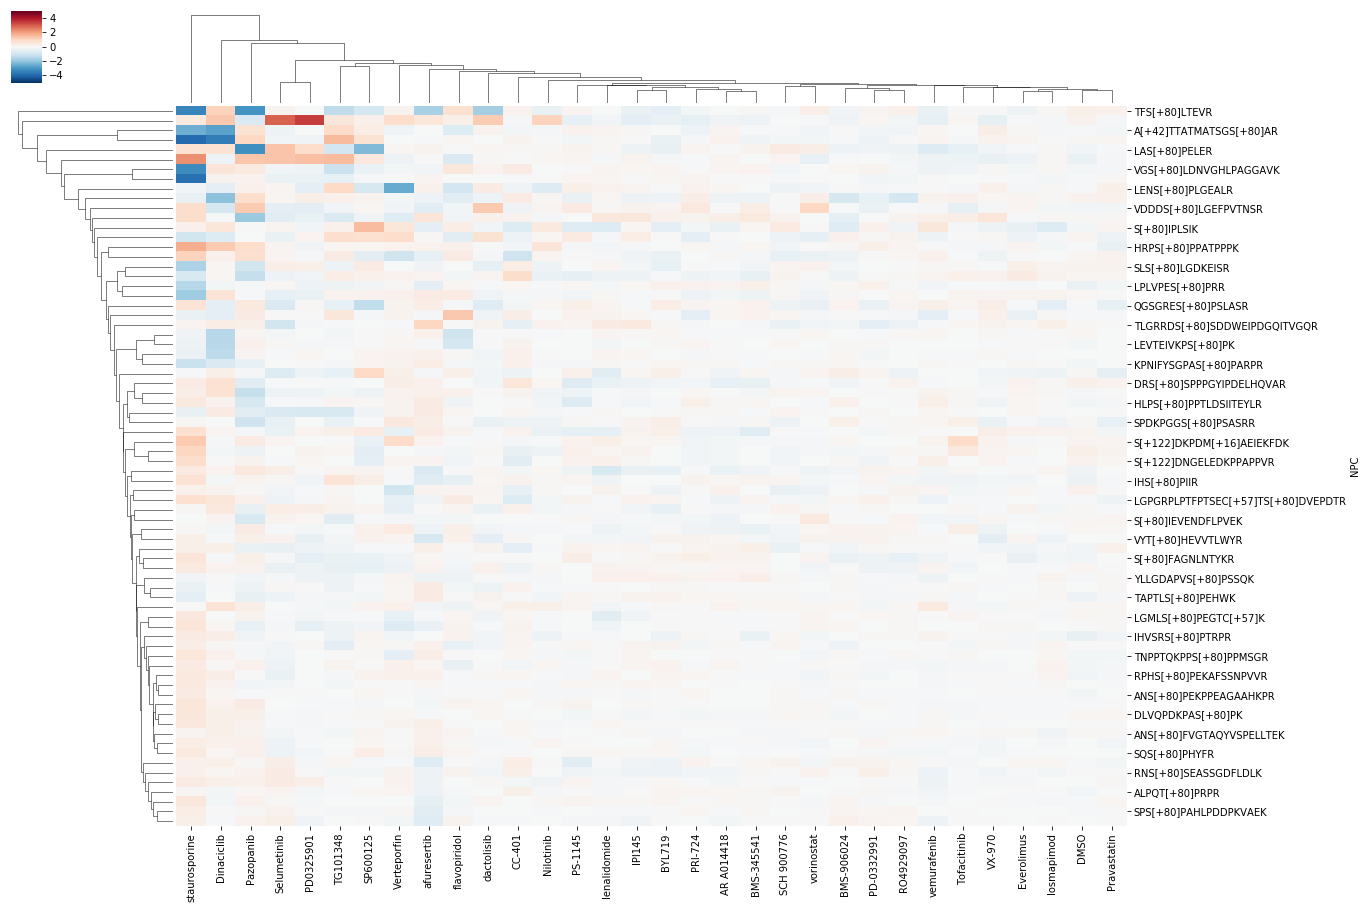

In [132]:
df_NPC = working_lincs_p100['LINCS_P100_DIA_Plate27'].set_index('NPC')
df_NPC = df_NPC.interpolate()
sns.clustermap(df_NPC, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

Drug *staurosporine* has most influence 
- KIF4A 

# **big assumption need to discuss**


In [108]:
# **big assumption need to discuss**

def downregulations(dataframe, col_name):
    """ Assumption: data has normal distribution
    Z-score< -1.96 can be considered as down-regulation"""
    return dataframe.index[stats.zscore(dataframe[col_name].values) < -1.96].values
def upregulations(dataframe, col_name):
    """ Assumption: data has normal distribution
    Z-score > -1.96 can be considered as down-regulation"""
    return dataframe.index[stats.zscore(dataframe[col_name].values) > -1.96].values

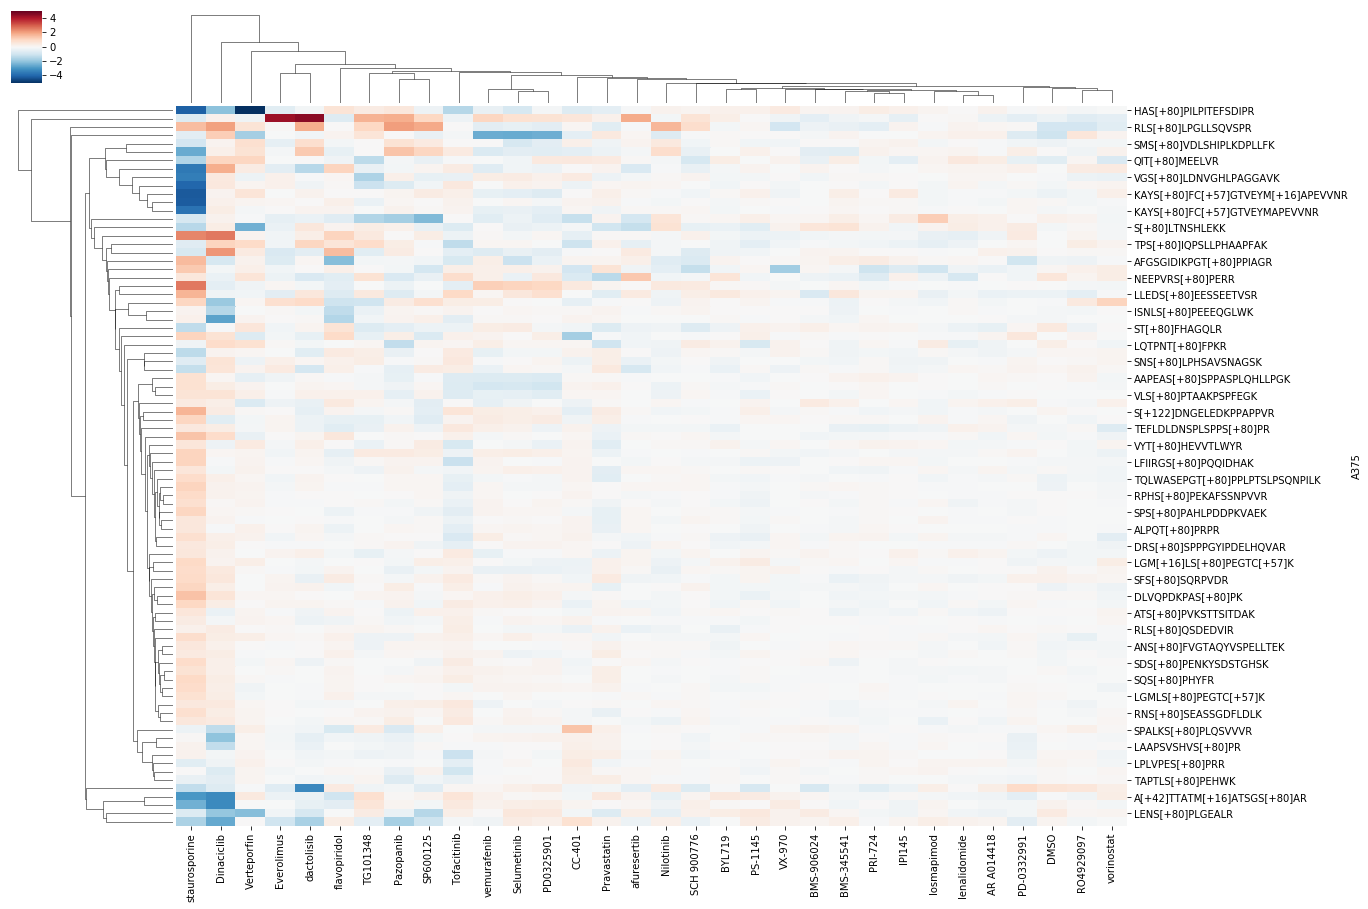

In [133]:
df_A375 = working_lincs_p100['LINCS_P100_PRM_Plate28'].set_index('A375')
df_A375 = df_A375.interpolate()
sns.clustermap(df_A375, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

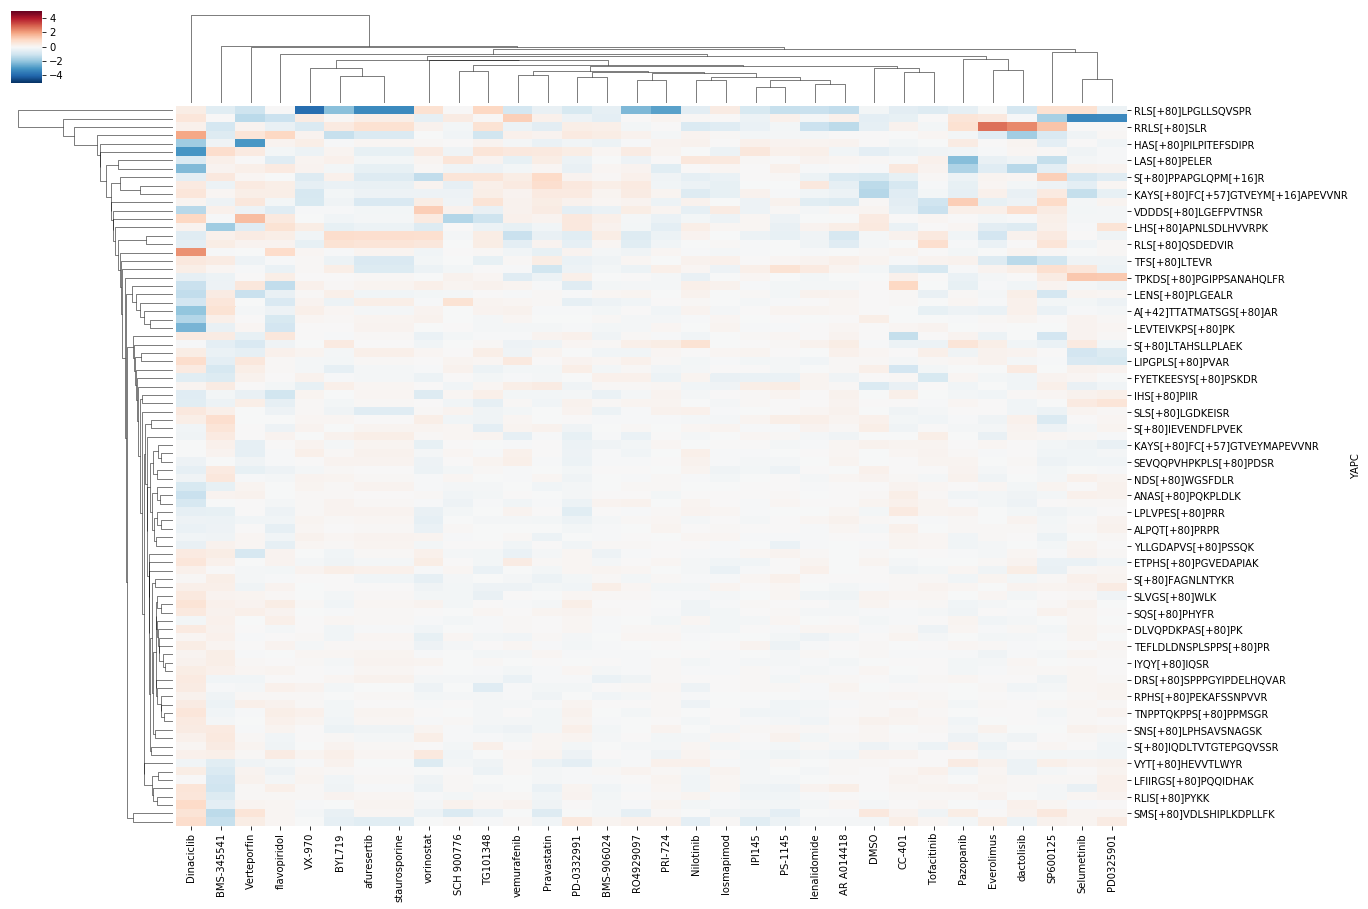

In [135]:
df_YAPC = working_lincs_p100['LINCS_P100_PRM_Plate32'].set_index('YAPC')
df_YAPC = df_YAPC.interpolate()
sns.clustermap(df_YAPC, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

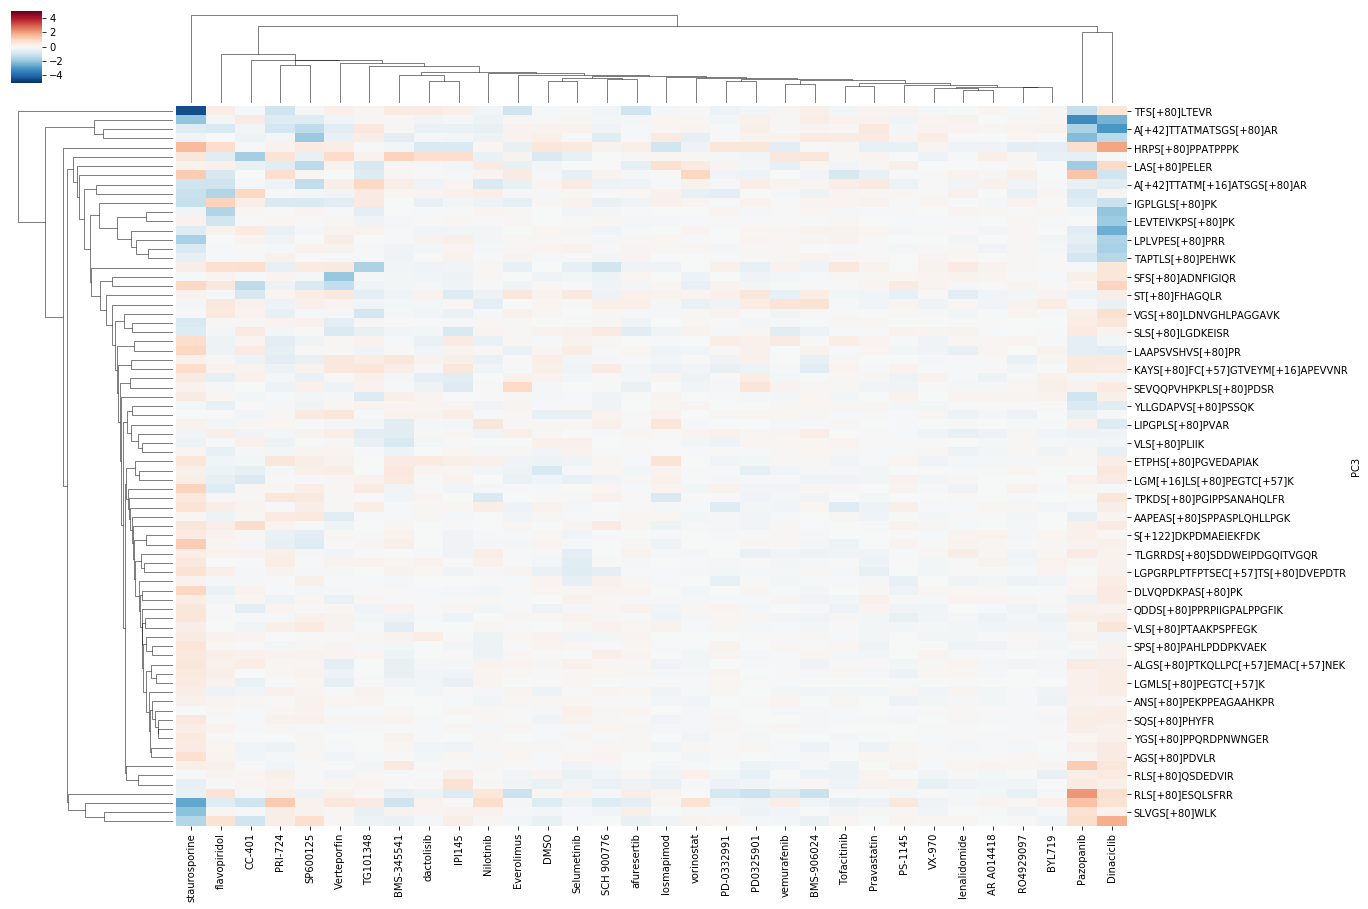

In [18]:

df_PC3 = working_lincs_p100['LINCS_P100_DIA_Plate34'].set_index('PC3')
df_PC3 = df_PC3.interpolate()
sns.clustermap(df_PC3, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

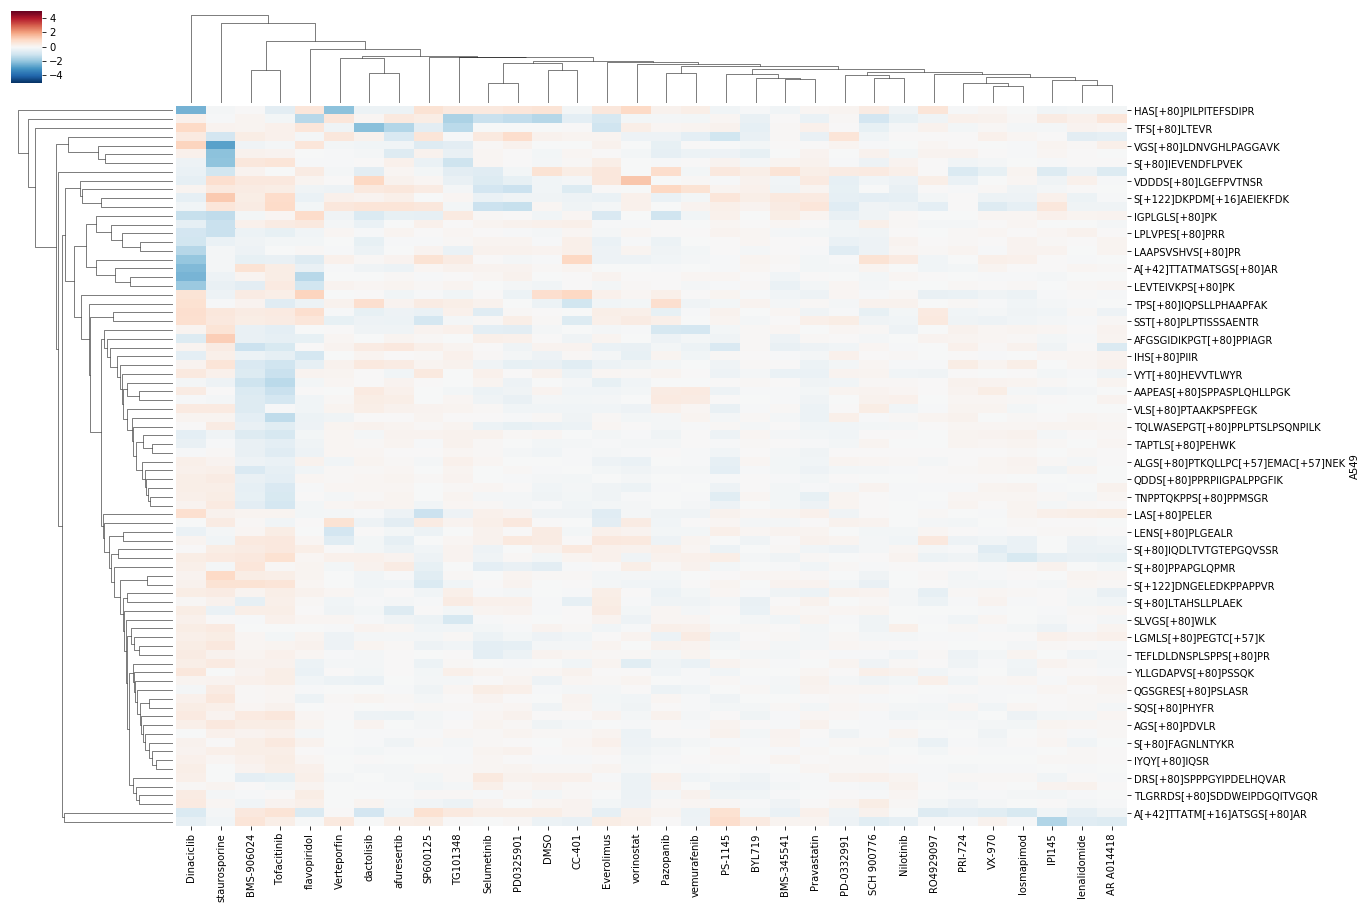

In [19]:

df_A549 = working_lincs_p100['LINCS_P100_DIA_Plate33'].set_index('A549')
df_A549 = df_A549.interpolate()
sns.clustermap(df_A549, cmap='RdBu_r', figsize = (20,15), vmin=-5, vmax=5);

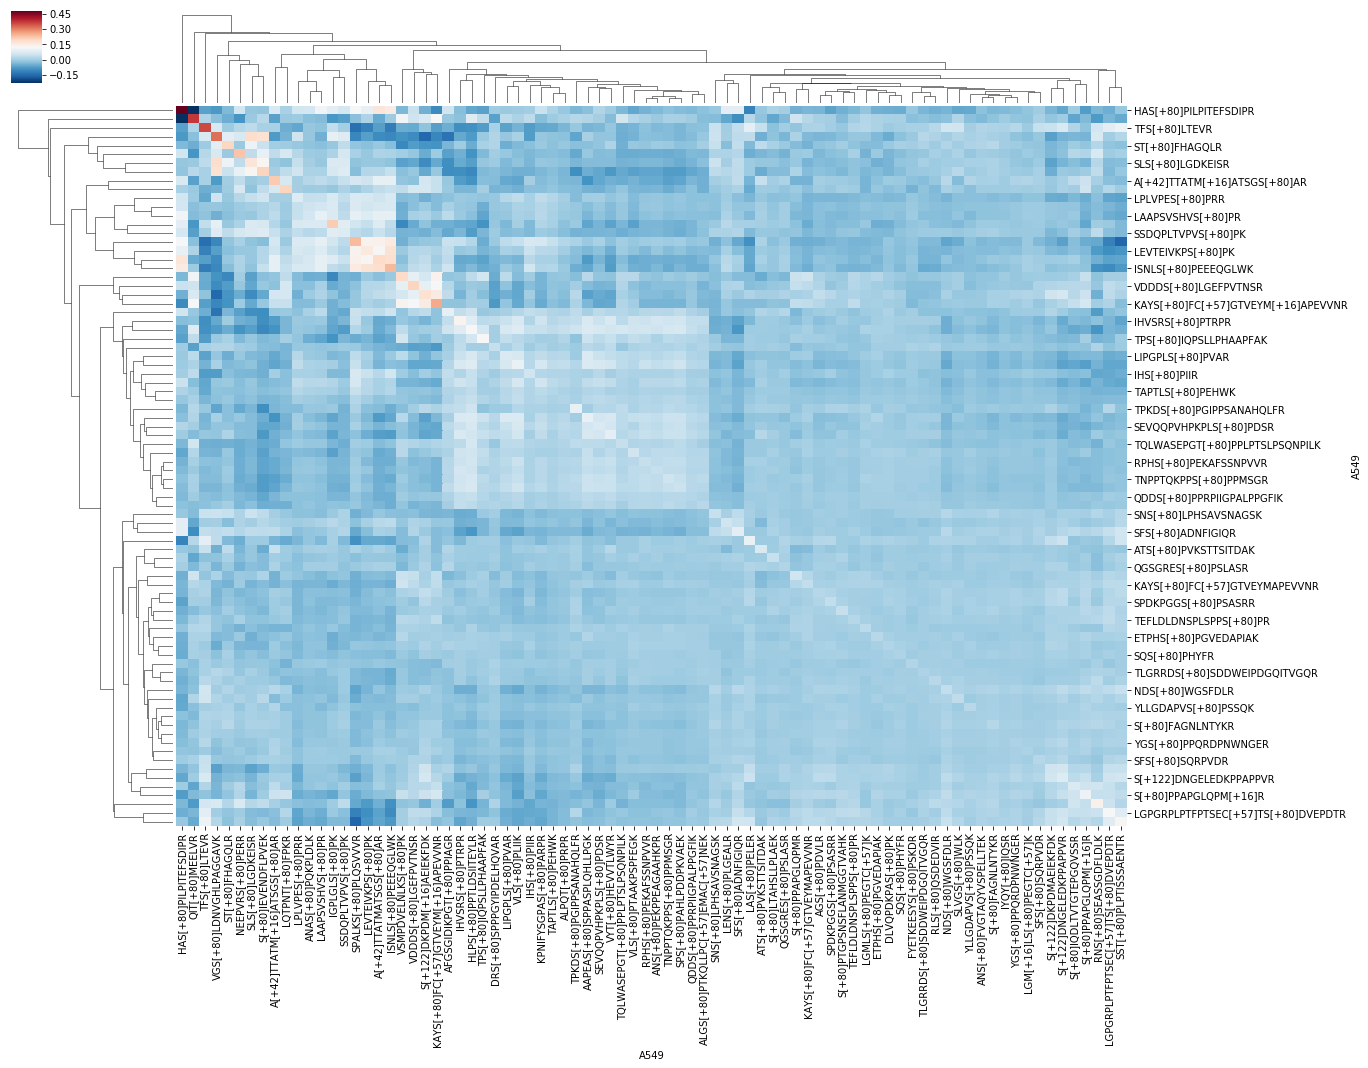

In [77]:
sns.clustermap(df_A549.T.cov(), cmap='RdBu_r', figsize = (20,15));

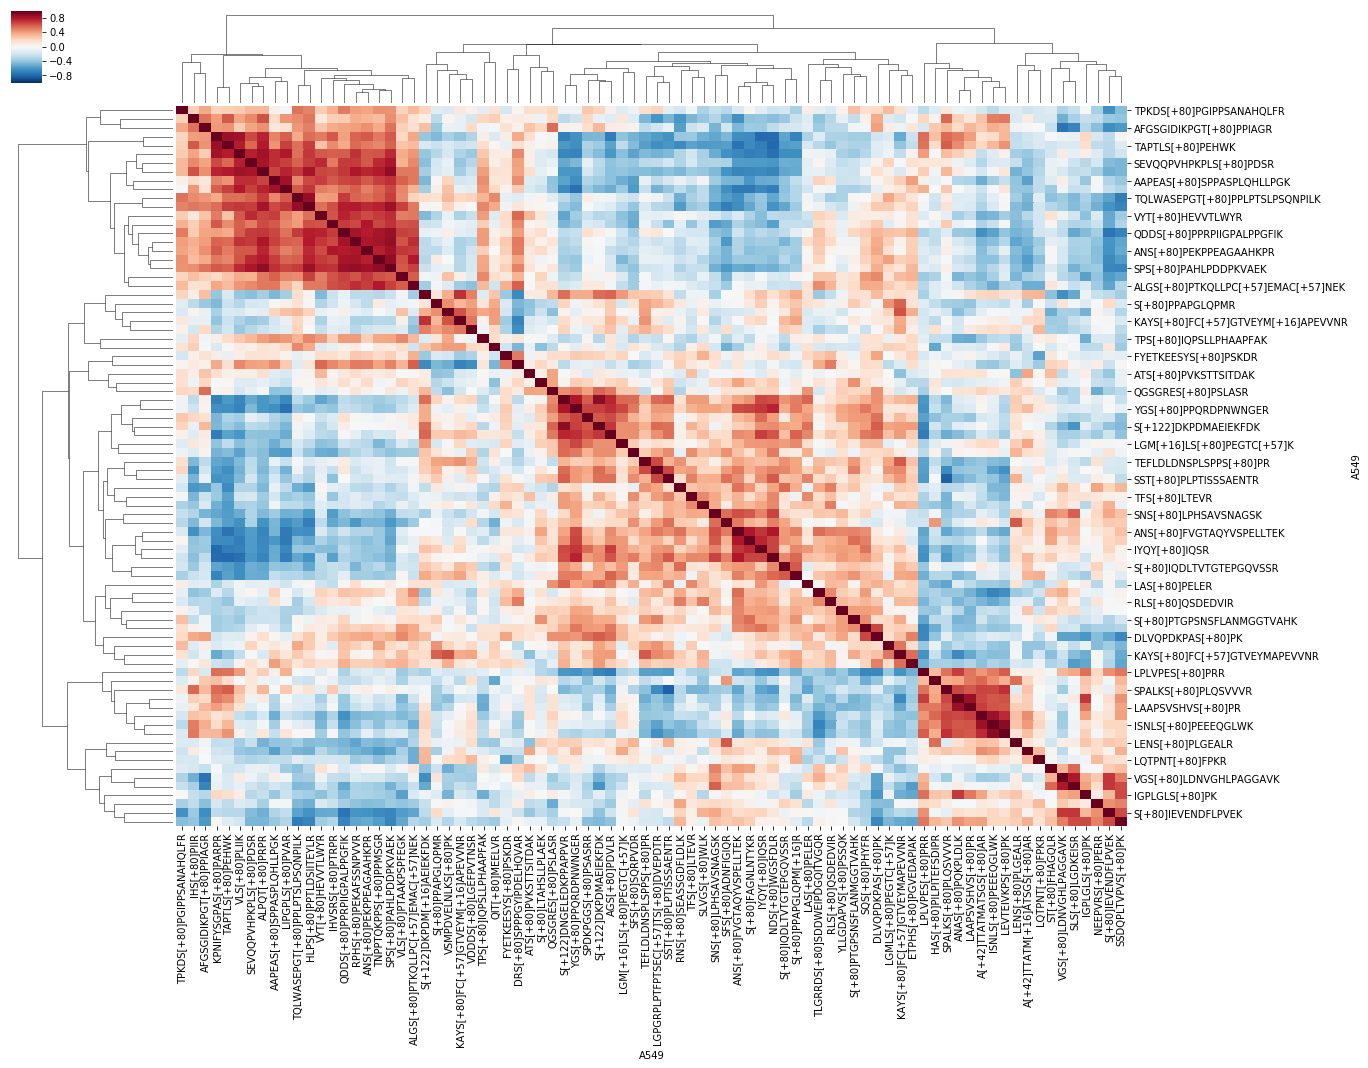

In [136]:
sns.clustermap(df_A549.T.corr(), cmap='RdBu_r', figsize = (20,15), vmin=-1, vmax=1);

In [137]:
# sns.clustermap(df_A549.T.corr('spearman'), cmap='RdBu_r', figsize = (20,15));

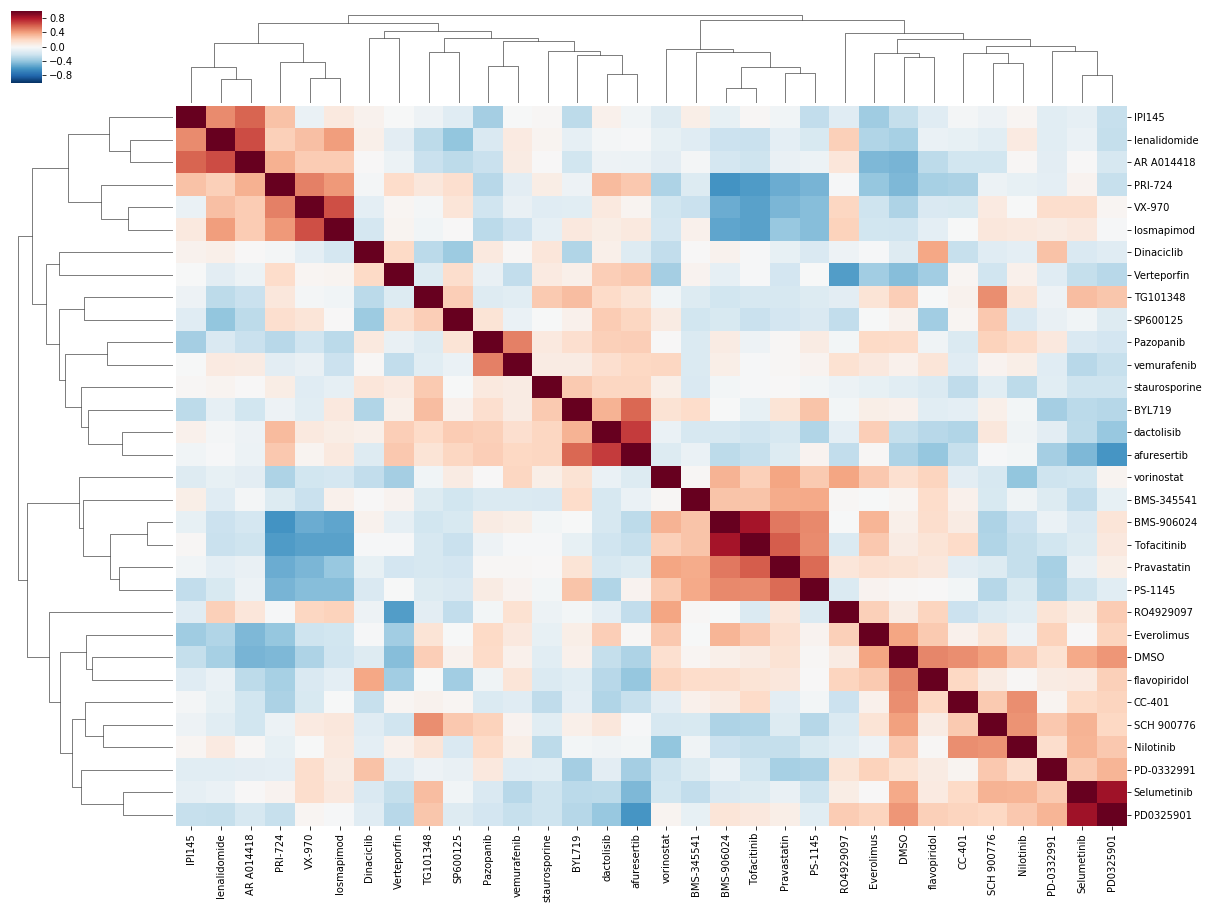

In [138]:
sns.clustermap(df_A549.corr(), cmap='RdBu_r', figsize = (20,15), vmin=-1, vmax=1);

In [44]:
(stats.zscore(df_A549.iloc[0].values)<1.96)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [22]:
from sklearn.decomposition import PCA

def t_sneanalysis(data, dimension=2, per=60):
    X = data.values
    t_embedded = TSNE(n_components= dimension, perplexity=per, learning_rate=10).fit_transform(X)
    return t_embedded

def pca_analysis(data, n_components):
    pca= PCA(n_components=n_components)
    return pca.fit_transform(data.values)

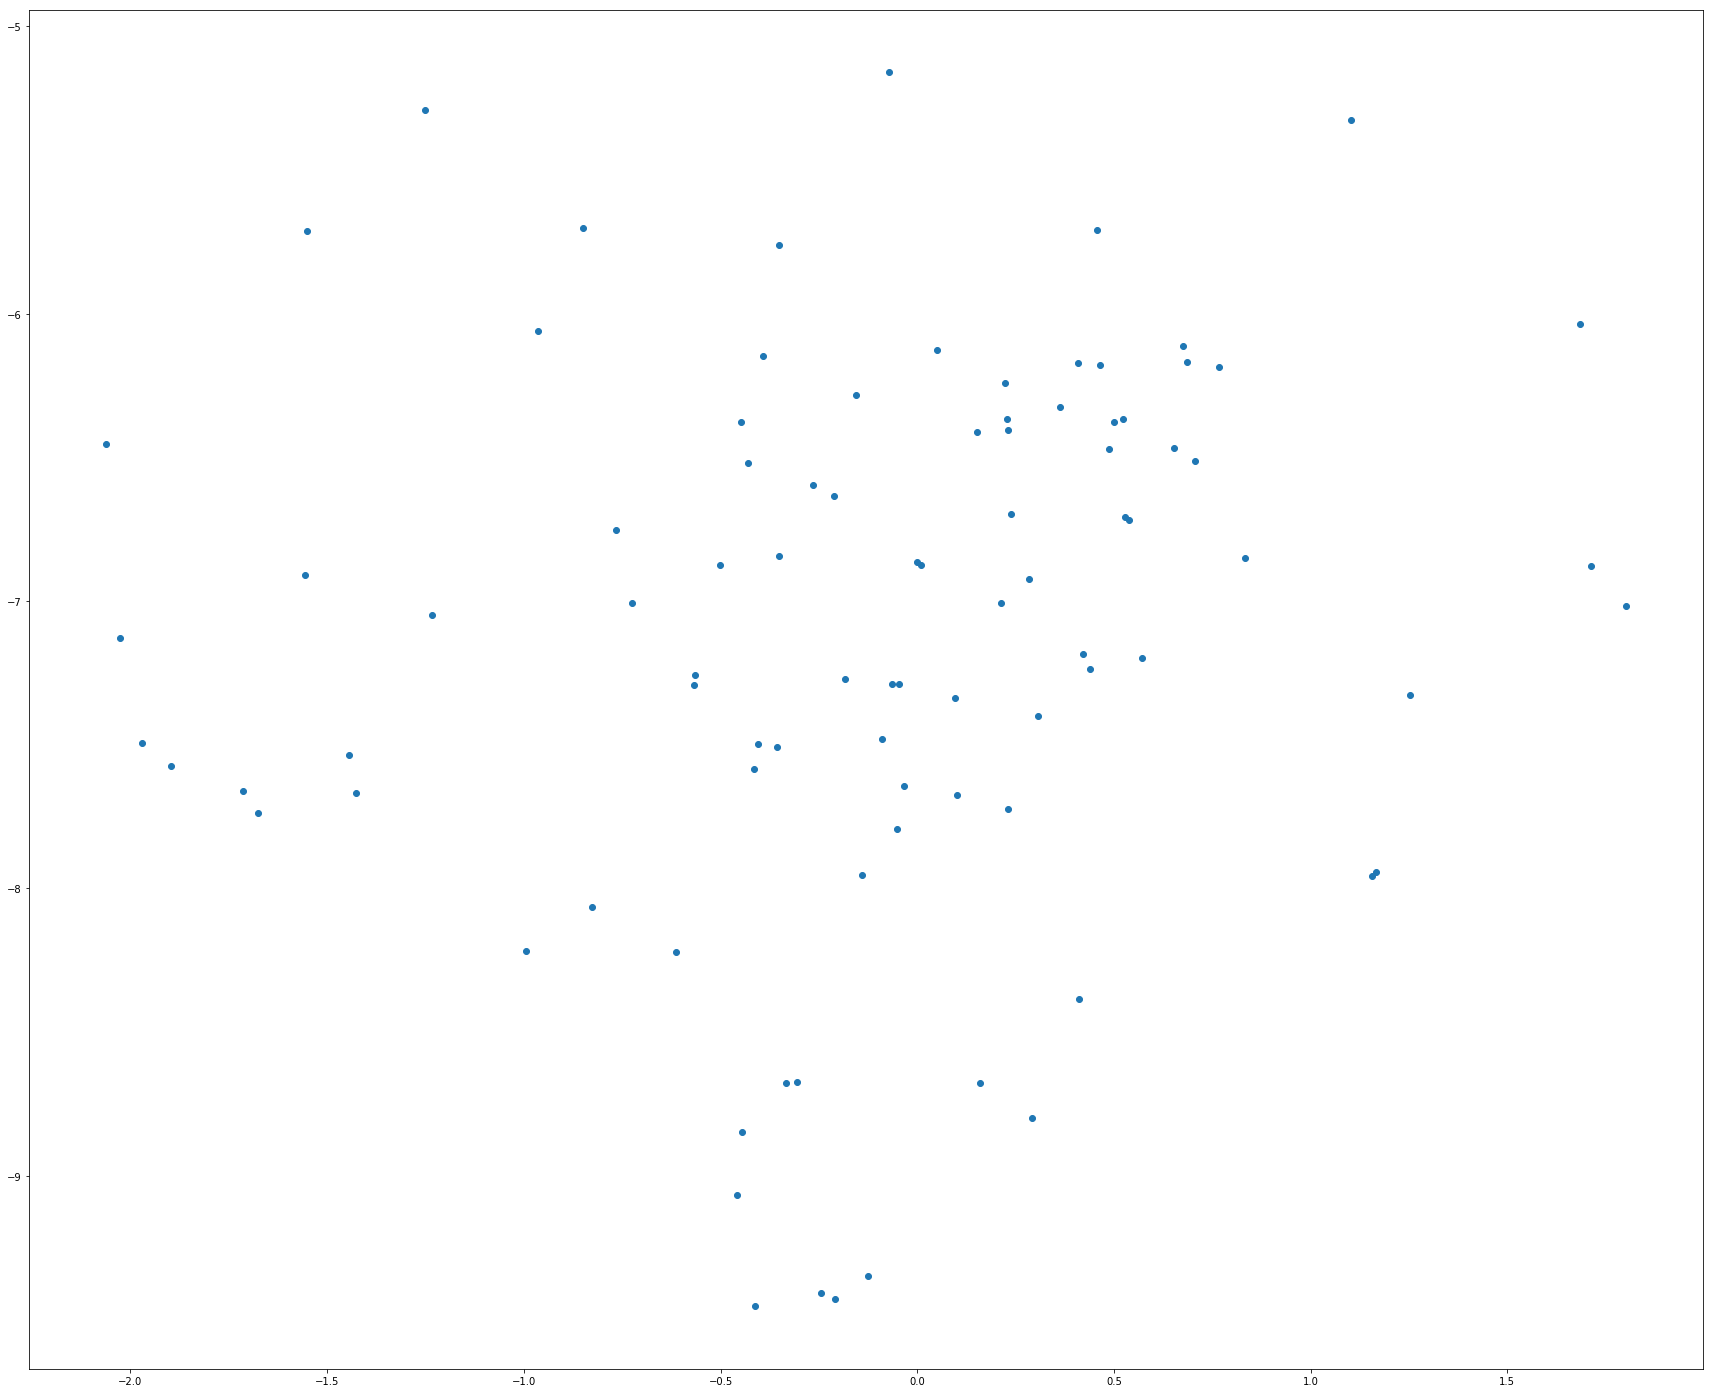

In [23]:
t_kinase = t_sneanalysis(df_24)
plt.scatter(t_kinase[:,0], t_kinase[:,1]);

In [24]:
pc = pca_analysis(df_24, 2)

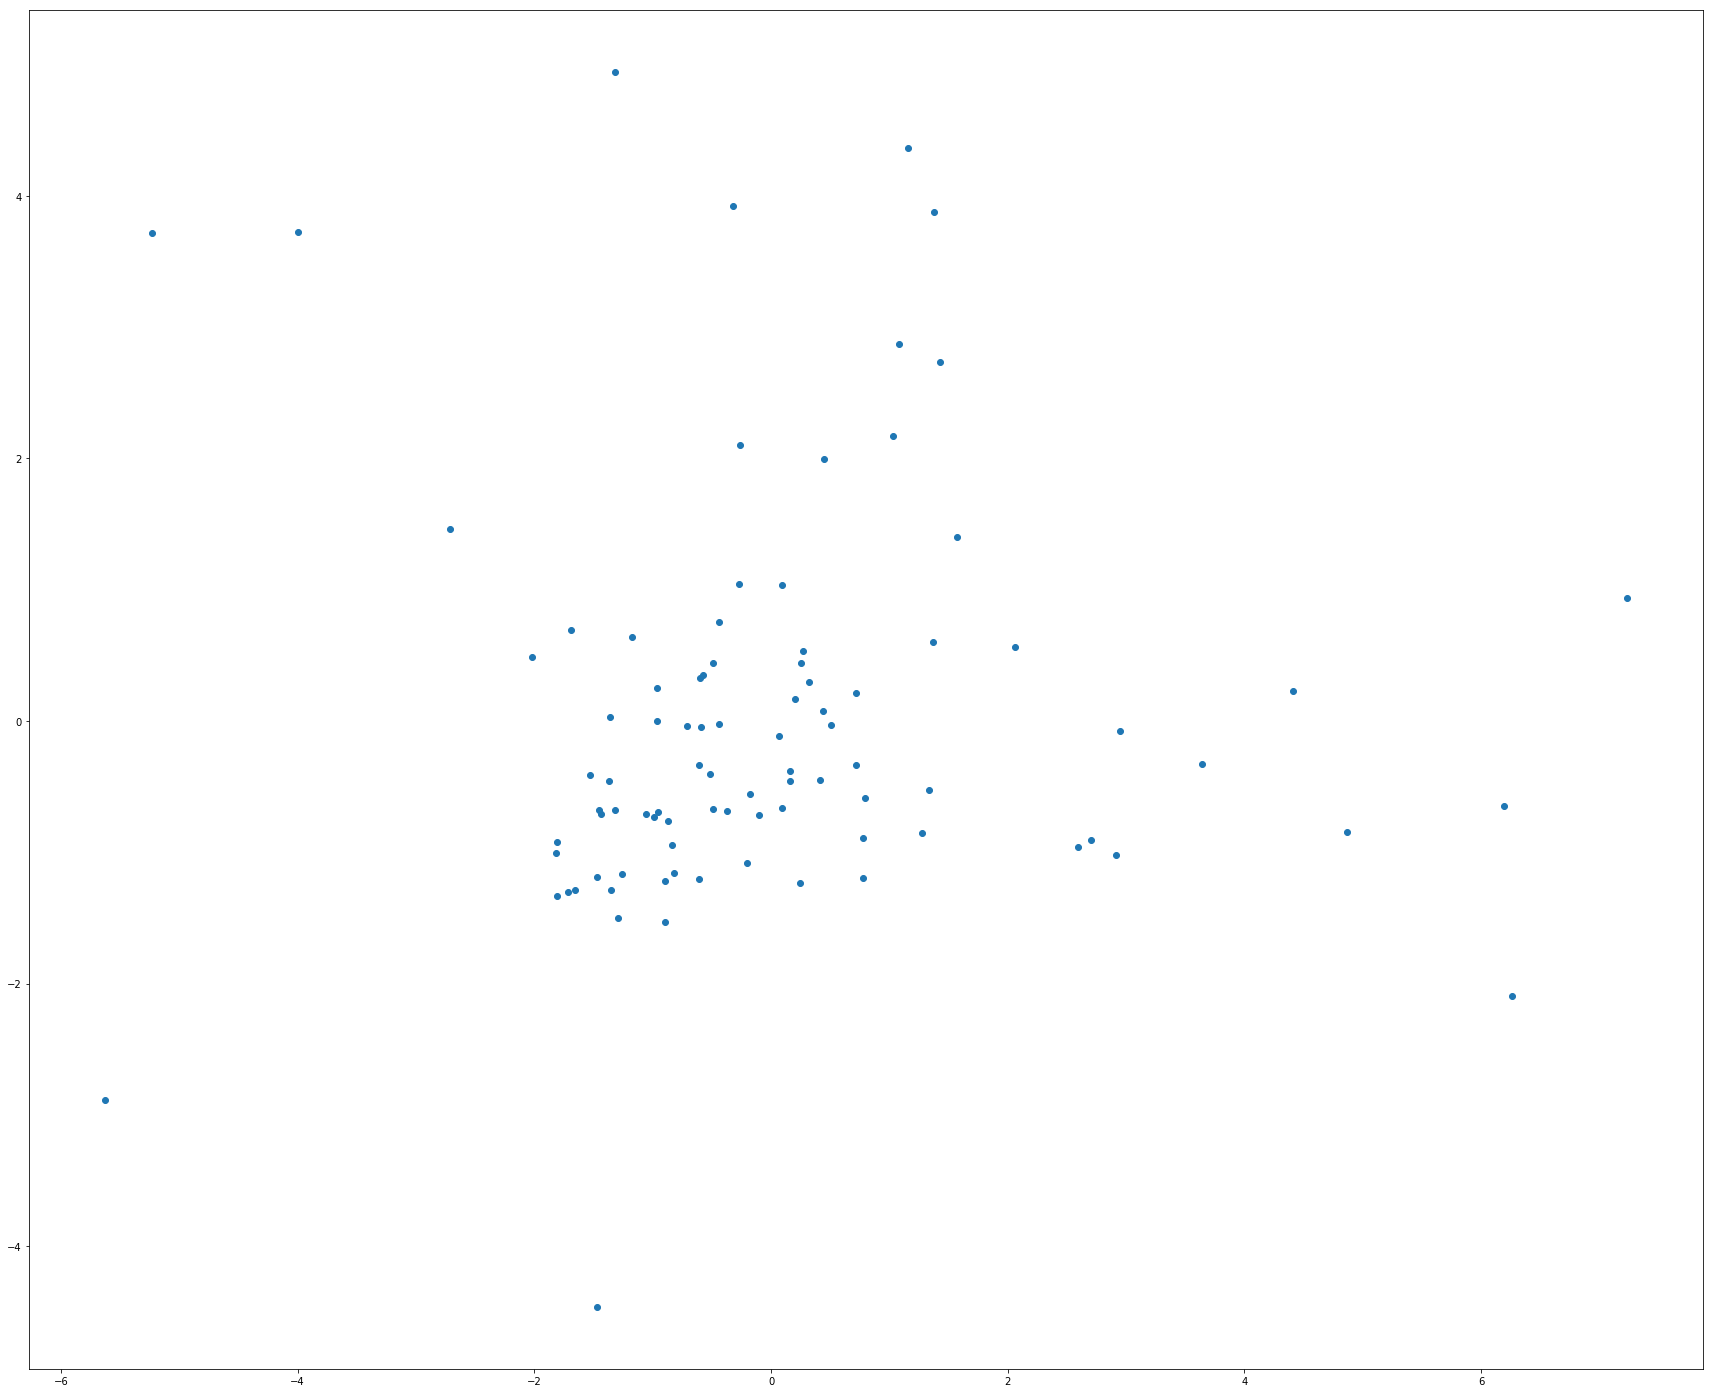

In [25]:
plt.scatter(pc[:,0], pc[:,1]);

In [26]:
working_lincs_p100['LINCS_P100_DIA_Plate27'].head()

,NPC,DMSO,flavopiridol,CC-401,Pazopanib,Selumetinib,PD-0332991,SCH 900776,Nilotinib,PD0325901,...,dactolisib,IPI145,Tofacitinib,SP600125,afuresertib,staurosporine,Pravastatin,vorinostat,BYL719,PS-1145
19,IYQY[+80]IQSR,-0.019111,0.067164,-0.075369,0.270228,-0.289719,0.117993,-0.083802,0.138025,-0.063086,...,-0.098822,-0.024247,-0.079818,0.113169,0.250750,0.359376,-0.163839,-0.168338,0.067212,0.037752
20,TPKDS[+80]PGIPPSANAHQLFR,-0.321789,-0.740104,0.002915,1.403989,1.419831,-0.005058,0.126698,0.095904,1.506496,...,0.065716,0.171048,-0.300836,0.545009,NaN,2.303235,-0.079442,-0.419472,NaN,0.135255
21,RNS[+80]SEASSGDFLDLK,0.016651,0.185323,0.281689,0.217865,0.409194,0.292825,0.009019,-0.026009,0.032783,...,-0.164875,-0.283713,-0.070025,-0.147616,NaN,0.241553,0.007737,0.217503,-0.289120,-0.195440
22,LPLVPES[+80]PRR,-0.350689,0.105957,0.080687,-0.072312,0.103718,0.249198,0.069509,-0.063781,-0.298971,...,-0.050622,0.081913,-0.071271,-0.178510,-0.483576,-1.421853,-0.145502,-0.113612,0.253167,0.110038
23,ANAS[+80]PQKPLDLK,-0.020958,0.077784,0.248626,0.140105,-0.066004,-0.123369,-0.028936,0.000888,0.096019,...,-0.186858,0.105658,-0.067804,0.127292,0.235807,-0.331835,-0.031517,-0.047442,-0.015651,-0.028860


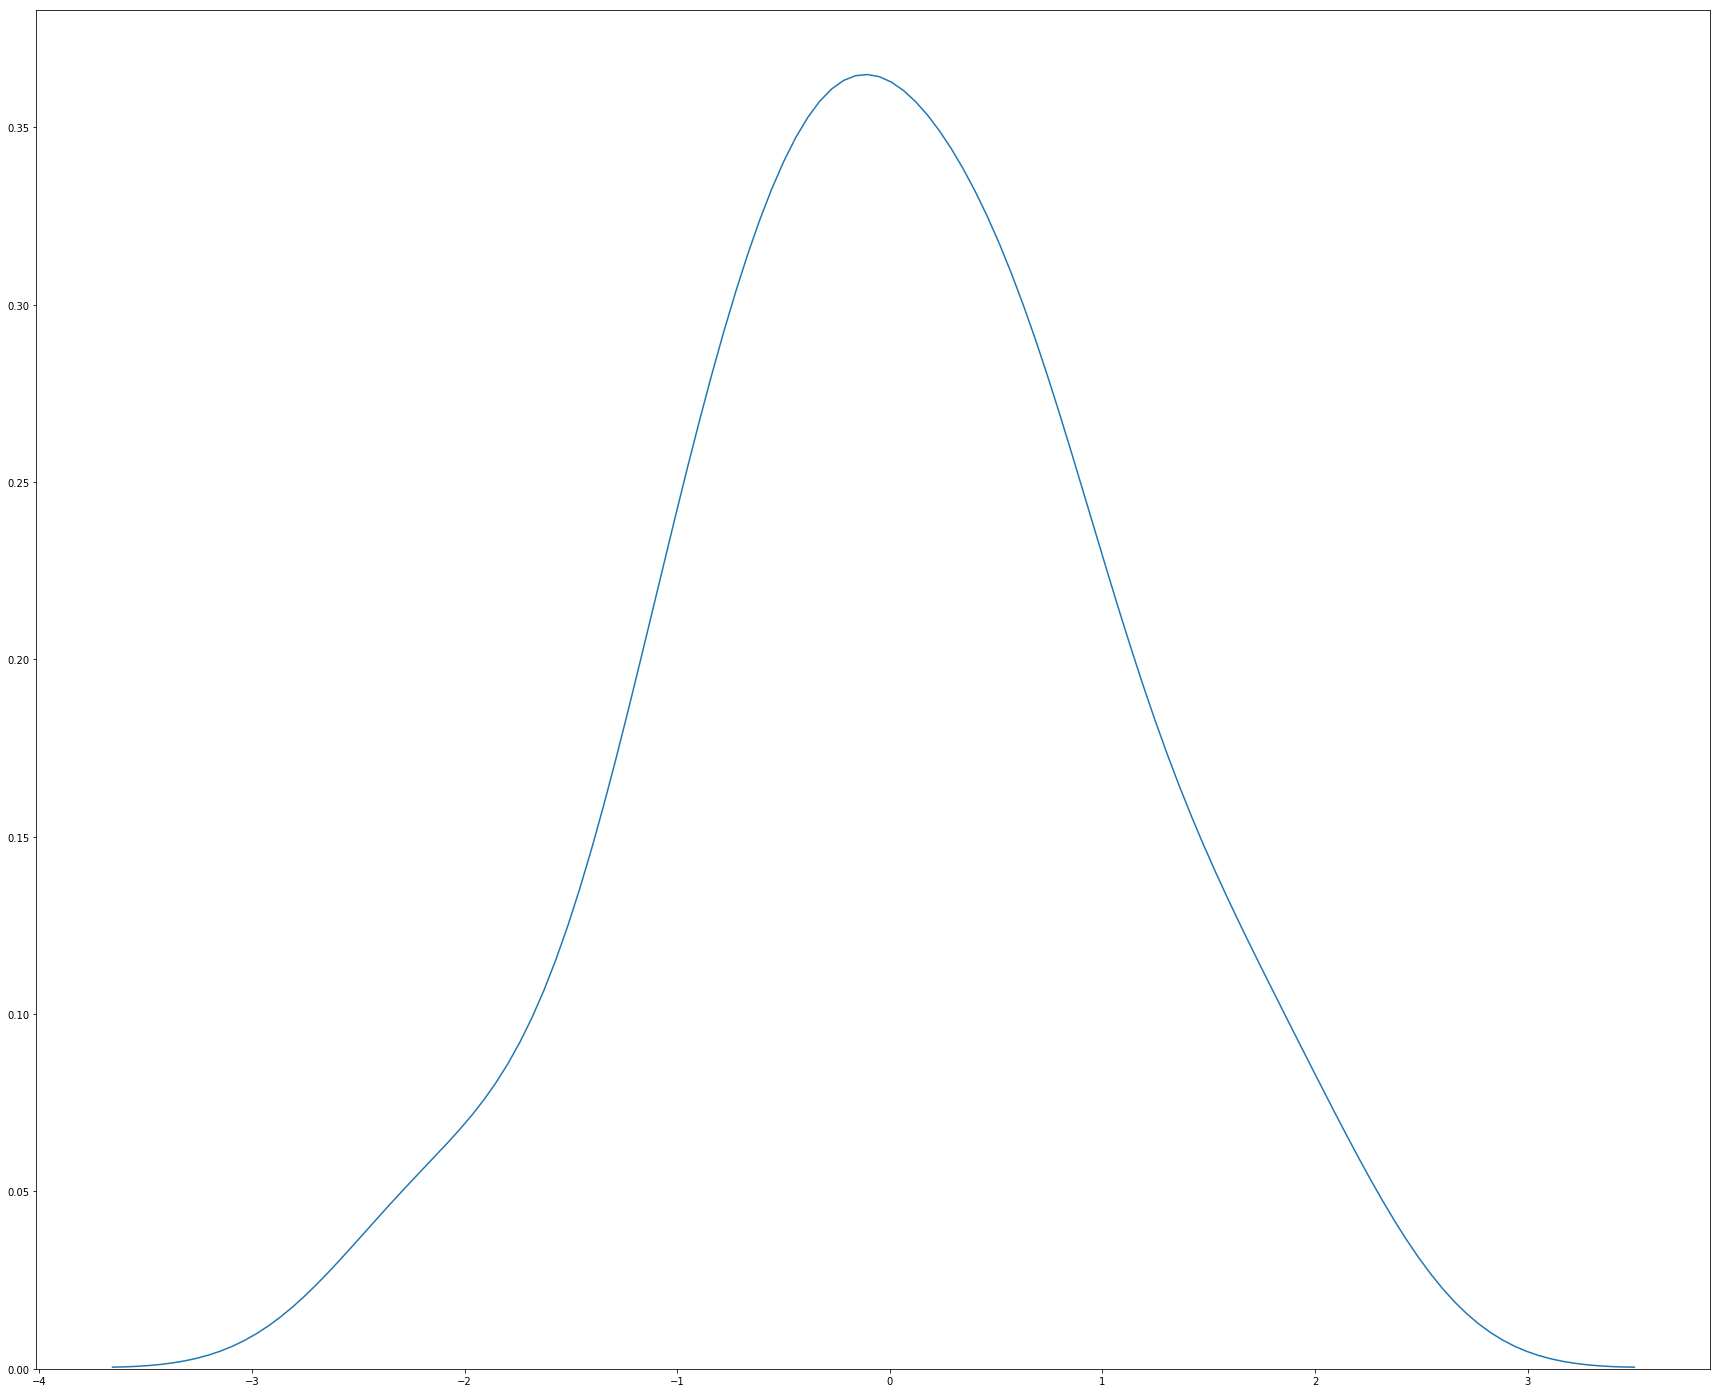

In [32]:
sns.kdeplot(stats.zscore(df_NPC['DMSO'].values))


In [33]:
(stats.zscore(df_NPC['DMSO'].values)>1.96)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False])

In [189]:
# kinase_lics = ['LINCS_P100_DIA_Plate27',
# 'LINCS_P100_PRM_Plate28',
# 'LINCS_P100_PRM_Plate29_24H',
# 'LINCS_P100_PRM_Plate32',
# 'LINCS_P100_DIA_Plate33'
# 'LINCS_P100_DIA_Plate34',
# ]

# print (working_lincs_p100[kinase_lics[0]].columns[0])
# kinase_colums = [working_lincs_p100[kinase_lics[0]].columns[0] +'_'+ s for s in working_lincs_p100[kinase_lics[0]].columns.values] 
# print (kinase_colums)
# kinase_concat_lincs = working_lincs_p100[kinase_lics[0]].set_index(working_lincs_p100[kinase_lics[0]].columns[0])
# kinase_concat_lincs = kinase_concat_lincs.rename(columns=kinase_colums)
# kinase_concat_lincs.head()
# # for i in range(1,len(kinase_lics)):
# #     print (i, working_lincs_p100[kinase_lics[i]].columns[0])
# #     _ = working_lincs_p100[kinase_lics[i]].set_index(working_lincs_p100[kinase_lics[i]].columns[0])
# #     kinase_concat_lincs = pd.concat([kinase_concat_lincs, _], axis=1)

In [188]:
%%capture
# import graphviz as gv
# def edges(matr):
#     edge = {}
#     for m in matr.columns:
#         for n in matr.index:
#             a,b = m,n 
#             if a > b: #only add edge once
#                 x = matr.at[m, n]
#                 edge[m,n] = float("{0:.4f}".format(x))
#     return edge
# e = edges(df_NPC.T.corr())
# g = gv.Graph(format="png")
# for k, v in e.iteritems():
#     g.edge(k[0], k[1], len=str(v))

#     print str(g)
# abs(df_NPC.T.corr())>0.98
# # for i in range(0, (df_NPC.shape[1])-1):


In [51]:
df_NPC.values

array([[-0.01911069,  0.06716367, -0.0753686 , ..., -0.16833823,
         0.06721154,  0.03775181],
       [-0.32178912, -0.7401043 ,  0.00291492, ..., -0.41947197,
        -0.11095419,  0.13525463],
       [ 0.01665057,  0.18532255,  0.28168898, ...,  0.21750319,
        -0.28911993, -0.19543965],
       ...,
       [-0.03239417,  0.23614882,  0.04942115, ...,  0.19376899,
         0.19189923, -0.13749044],
       [ 0.10798686,  0.40206394, -1.04465521, ..., -0.3475551 ,
        -0.33665045,  0.0132416 ],
       [-0.18710086, -0.10456177,  0.29483033, ..., -0.01117181,
         0.13033343,  0.01158523]])